# Digital Systems

https://ocw.mit.edu/courses/res-6-008-digital-signal-processing-spring-2011/pages/study-materials/

https://www.dafx.de/DAFX_Book_Page_2nd_edition/matlab.html

A digital system is represented by an algorithm which uses the input signal $x(n)$ as a sequence(or `stream`) of numbers and perform math operation upon this input.

the result is the output signal $y(n)$.

$
x(n) \quad \Rightarrow \quad y(n)
$


### Linear Time-Invariant (LTI) System

An **LTI system** is one whose behavior does not change over time (**time-invariant**) and follows the **superposition principle** (**linear**). This means the system responds to inputs in a consistent way regardless of when the input is applied and reacts predictably to combinations of inputs.

#### **Superposition Principle**

The **superposition principle** states that if a system responds to input $A$ with output $X$, and responds to input $B$ with output $Y$, then applying both inputs together, $A + B$, will result in the sum of the individual outputs:

$
F(A + B) = F(A) + F(B)
$

Additionally, for a scalar $a$, scaling the input results in a scaled output:

$
F(a \cdot A) = a \cdot F(A)
$

This property ensures that LTI systems handle combinations and scalings of signals in a predictable, linear way.


#### **Unit Impulse $\delta(n)$**
The **unit impulse** function $\delta(n)$ in discrete systems is defined as:

$
\delta(n) =
\begin{cases}
1, & \text{if } n = 0 \\
0, & \text{if } n \neq 0
\end{cases}
$

This means $\delta(n)$ is a signal that is 0 everywhere except at $n = 0$, where its value is 1. Example:

        [1.0, 0.0, 0.0, 0.0 ...]


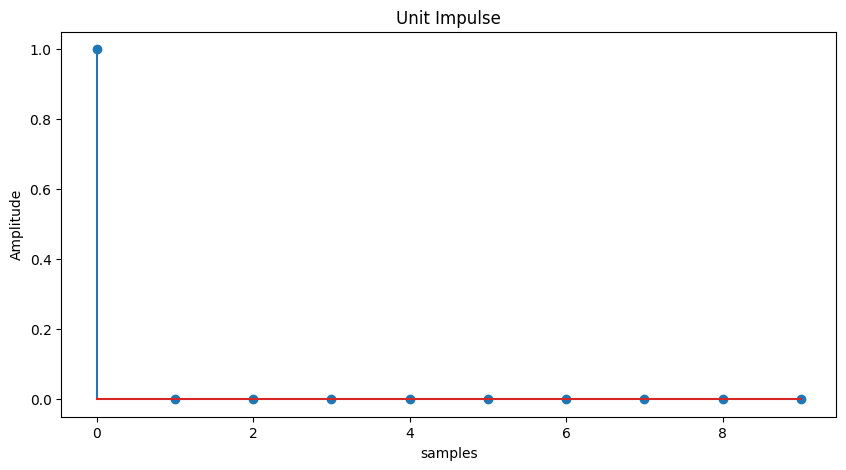

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def unit_impulse(n):
    return np.where(n == 0, 1, 0)

sample_index = np.arange(0, 10)

plt.figure(figsize=(10, 5))
plt.stem(sample_index, unit_impulse(sample_index))
plt.title("Unit Impulse")
plt.xlabel("samples")
plt.ylabel("Amplitude")

plt.show()

#### **Time Invariance**

**Time invariance** means that shifting the input in time results in an equally shifted output. In other words, if $x(n)$ produces $y(n)$, then shifting the input by $n_0$ results in the output being shifted by $n_0$ as well:

$
x(n - n_0) \quad \Rightarrow \quad y(n - n_0)
$

#### **Impulse Response $h(n)$**

The **impulse response** $h(n)$ of an LTI system is the output when the system is fed with the **unit impulse** $\delta(n)$, which is 1 at $n = 0$ and 0 elsewhere. This response characterizes the system completely, and any arbitrary input $x(n)$ can be processed by **convolving** it with $h(n)$:
<br> <br>
<div align="center">
$$
\large
y(n) = \sum_{k=-\infty}^{\infty} x(k)\cdot h(n - k)
\large
$$
</div>
<br> <br>

That can be abreviated to 
<br> <br>

<div align="center">
$$
\large
y(n) = x(n) * h(n)
\large
$$
</div>

<br> <br>

Below an example of a the impulse response of a very simple moving average filter

<br><br>
$$
\large
y(n) = \frac{1}{M} \sum_{k=0}^{M-1} x(n - k)
\large
$$


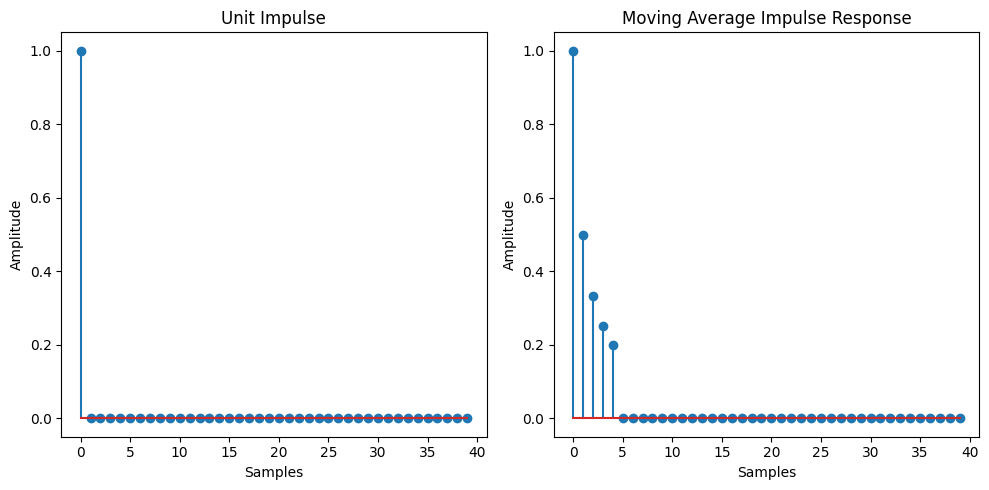

In [3]:
def moving_average_system(x, filter_size=5):
    y = np.zeros(len(x))
    
    for n in range(filter_size):
        y[n] = np.mean(x[:n + 1])

    for n in range(filter_size -1, len(x)):
        y[n] = np.mean(x[n - filter_size + 1: n + 1])

    return y

N = 40
u = unit_impulse(np.arange(N))
ir = moving_average_system(u)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.stem(np.arange(N), u)
plt.title('Unit Impulse')
plt.xlabel("Samples")
plt.ylabel("Amplitude")

plt.subplot(1,2,2)
plt.stem(np.arange(N), ir)
plt.title('Moving Average Impulse Response')
plt.xlabel("Samples")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

We can use the Impulse Response Moving Average Filter to convolve a signal.

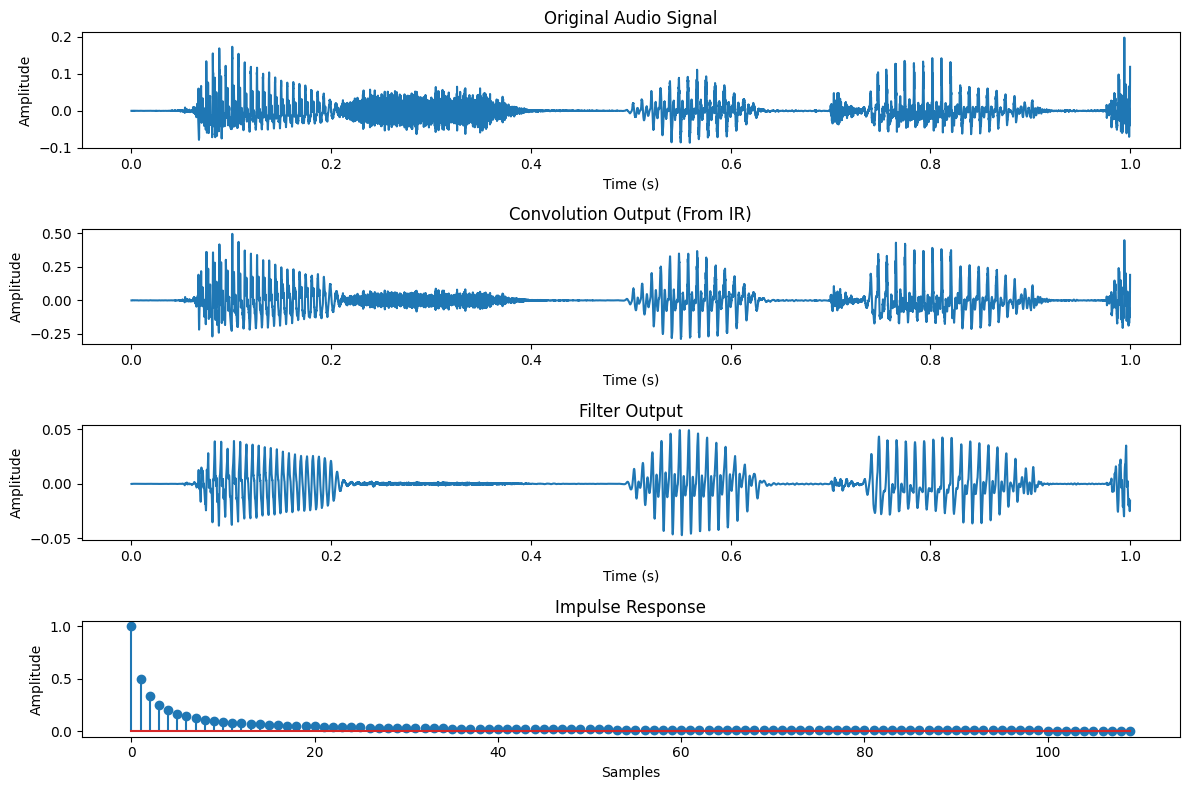

In [8]:
import librosa
import pydelia
import scipy

samples, sr = librosa.load('audio_examples/voice.wav', sr=None)
#one second
audio = samples[int(1.0 * sr): (int(2.0 *sr))]

filter_size = 100

N = len(audio)
u = unit_impulse(np.arange(N))
ir = moving_average_system(u, filter_size=filter_size)

conv_out = scipy.signal.convolve(audio, ir)[:N]
filter_out =  moving_average_system(audio, filter_size=filter_size)

plt.figure(figsize=(12, 8))
plt.subplot(4,1,1)
plt.plot(np.arange(N) / sr, audio)
plt.title("Original Audio Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(4, 1,2)
plt.plot(np.arange(N) / sr, conv_out, label="Convolution Output")
plt.title("Convolution Output (From IR)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(4, 1,3)
plt.plot(np.arange(N) / sr, filter_out, label="Filter Output")
plt.title("Filter Output")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(4,1,4)
plt.stem(np.arange(filter_size + 10), ir[:filter_size + 10])
plt.title('Impulse Response')
plt.xlabel("Samples")
plt.ylabel("Amplitude")


plt.tight_layout()
plt.show()

# Flowcharts and Basic Algorithms in Signal Processing

In digital signal processing (DSP), several fundamental operations are used repeatedly. These include **delaying** a signal, **scaling or weighting** it by a scalar (coefficient), and **adding** signals together. These operations are often represented in **flowcharts**, which visually show the step-by-step process of manipulating signals.

#### **Delay**

The **delay operation** shifts the signal by a certain amount. If the signal is $x(n)$, delaying it by $k$ time steps gives:

$
y(n) = x(n - k)
$

**flowchart**

    x(n) ───> [ z⁻ᵏ ] ───> y(n)


This operation is useful when you want to reference past values of the signal, which is common in filters and other signal processing algorithms.

#### **Weighting** (Scaling by a Coefficient)

In signal processing, you often **scale** or **weight** a signal by multiplying it by a constant $a$. The result is a signal where the amplitude is adjusted by the factor $a$. This is expressed as:

$
y(n) = a \cdot x(n)
$

**flowchart**

    x(n) ───> [ *a ] ───> y(n)


This operation is essential in applications where you need to control the strength of a signal (e.g., gain control in audio).

#### **Summing Weighted Signals**

When you have multiple signals, you can combine them by **adding** them together after applying different weights (scalars). For example, if you have two input signals $x_1(n)$ and $x_2(n)$, with weights $a_1$ and $a_2$, the output is:

$
y(n) = a_1 \cdot x_1(n) + a_2 \cdot x_2(n)
$

**flowchart**

     x₁(n) ─> [ *a₁ ]  ─┐
                        │
                        ├──> [+] ───> y(n)
                        │
     x₂(n) ─> [ *a₂ ]  ─┘



This is a **linear combination** of the two signals. It’s common in filters and systems that combine multiple inputs, where each input contributes a weighted amount to the output.

#### Example: Weighted Sum over Delayed Samples

A combination of the above operations can form more complex algorithms. For example, consider a case where the output $y(n)$ is the weighted sum of the current and previous two samples of the signal $x(n)$. The algorithm for this would be:

$
y(n) = \frac{1}{3}x(n) + \frac{1}{3}x(n-1) + \frac{1}{3}x(n-2)
$


**flowchart**

        x(n) ┬──────────────────────> [ *1/3 ]  ────┐
             │                                      │
             └─> [ z⁻¹] ─┬─────────>  [ *1/3 ]  ────┩
                         │                          │
                         └─>[ z⁻¹ ] ─> [ *1/3 ] ─> [+] ───> y(n)
 

This operation is like averaging the current and previous two samples, with equal weights. It's a simple example of a **moving average filter**, which is used to smooth signals or reduce noise.


## **Time Domain vs. Frequency Domain**

So far, you’ve been working in the **time domain**, where the relationship between the input and output of a digital system is described by the **impulse response** h$(n)$. This is the system’s response to an input unit impulse \$delta(n)$.

Now, we move into the **frequency domain**, which describes how the system behaves with respect to different **frequencies**. In the frequency domain, a system’s behavior is characterized by its ability to pass, reject, or modify certain frequencies in a signal. This is where terms like **transfer function** and **frequency response** come in.


### **Transfer Function**

The **transfer function**  $H(z) $ is a more general, frequency-domain representation of the system, and it is obtained using the **Z-transform** of the impulse response  $h(n) $. The Z-transform is a generalization of the Fourier transform that captures both **time-domain** and **frequency-domain** behavior, and this is why we use the complex variable  $z $.

The **Z-transform** of the system's impulse response  $h(n)$ is:

$$
\large
H(z) = \sum_{n=-\infty}^{\infty} h(n) \cdot z^{-n}
\large
$$

Where:
- **$H(z)$** → is the **transfer function**, describing the system in the Z-domain.
- **$h(n)$** → is the **impulse response** of the system in the time domain.
- **z$^{-n}$** → is a complex exponential that encodes both time and frequency behavior. It's related by substitution with the frequency response (see below):  $z \rightarrow e^{j \omega} $.

#### **Alternative Definition**: Transfer Function as the Ratio of Output and Input Z-transforms

Another way to view the transfer function is as the **ratio of the Z-transform of the output**  $Y(z) $ to the **Z-transform of the input**  $X(z) $:

$$
\large
H(z) = \frac{Y(z)}{X(z)}
\large
$$

This describes how the system transforms an input signal  $x(n) $ into an output signal  $y(n) $ in the Z-domain. For a unit impulse input  $x(n) = \delta(n) $, the output is exactly the impulse response, and  $H(z) $ becomes the Z-transform of  $h(n) $.

These two perspectives of the transfer function are equivalent: 
- When you apply a unit impulse,  $H(z) $ is simply the Z-transform of the impulse response  $h(n) $.
- For any other input signal, the transfer function describes how the input is transformed into the output.


**Example**

- Imagine that our impulse response is an exponential signal  $h(n) = 0.9^n $, which decays over time.
- To transform this impulse response to the **Z-domain**, we apply the **Z-transform**, which is the sum of the product of  $h(n) $ and  $z^{-n} $:

$$
H(z) = \sum_{n=0}^{\infty} 0.9^n \cdot z^{-n}
$$


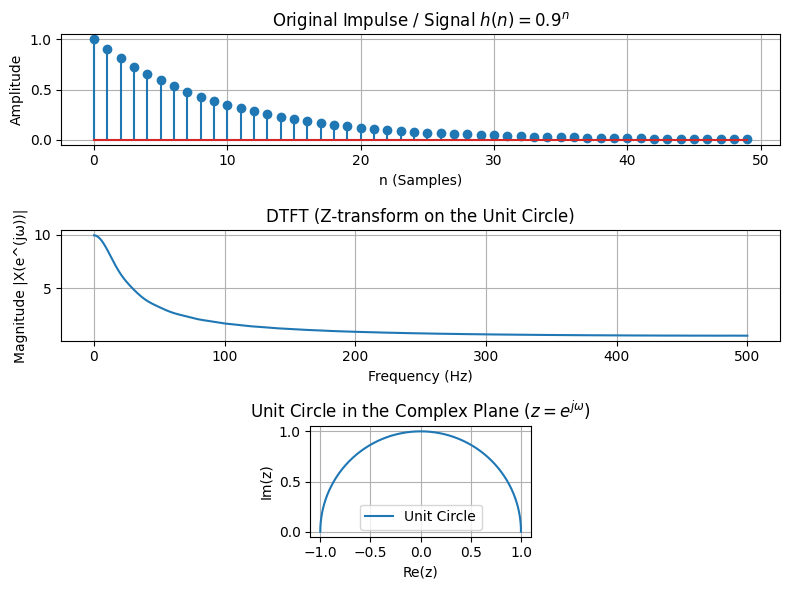

In [4]:
def z_transform(h_n, z):
    n = np.arange(len(h_n))  
    # sum (h(n) * z^(-n))
    X_z = np.sum(h_n * z**(-n)) 
    
    return X_z

# Time-domain signal
a = 0.9
n = np.arange(0, 50)
h_n = a**n  # x(n) = 0.9^n for n >= 0
f_s=1000

frequencies = np.linspace(0, f_s / 2, 512)  # frequency range from 0 to Nyquist 

# Angular Frequency: omega = 2 * pi * f / f_s
omega = 2 * np.pi * frequencies / f_s

# Compute Z-transform on the unit circle z = e^(jω)
z_unit_circle = np.exp(1j * omega)  

# Compute Z-transform
X_z_unit_circle = np.array([z_transform(h_n, z) for z in z_unit_circle])  

plt.figure(figsize=(8, 6))

# Original Signal (0.9^n)
plt.subplot(3, 1, 1)
plt.stem(n, h_n)
plt.title("Original Impulse / Signal $%s$" % "h(n) = 0.9^n")
plt.xlabel("n (Samples)")
plt.ylabel("Amplitude")
plt.grid(True)

# Z-transform on the Unit Circle
plt.subplot(3, 1, 2)
plt.plot(frequencies, np.abs(X_z_unit_circle))
plt.title("DTFT (Z-transform on the Unit Circle)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude |X(e^(jω))|")
plt.grid(True)


plt.subplot(3, 1, 3)
plt.plot(np.real(z_unit_circle), np.imag(z_unit_circle), label="Unit Circle")
plt.title("Unit Circle in the Complex Plane ($%s$)" % "z = e^{jω}")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.gca().set_aspect('equal', adjustable='box')  
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.show()


### **Frequency Response**

The frequency response $H(f)$ specifically desctibes how the system behaves with respect to different **frequencies**. It tell us how different frequencies components of the input signal are altered (e.g. amplified, attenuated) by the system.

To get the frequency response, we apply the Discrete-Time Fourier Transform(DTFT) to the impulse response $h(n)$. This essentially a special case of the Z-transform, where we substitute $z = \epsilon^{j \omega}$, focusing purely on the frequency behaviour:

<br> <br>
$$
\large
H(e^{j\omega}) = \sum_{n=-\infty}^{\infty} h(n) \cdot e^{-j\omega n}
\large
$$

with

$$
\large
\omega = \epsilon^{2 \pi f / fs}
\large
$$

<br> <br>
Below and example calculating the Frequency Response of the example moving filter

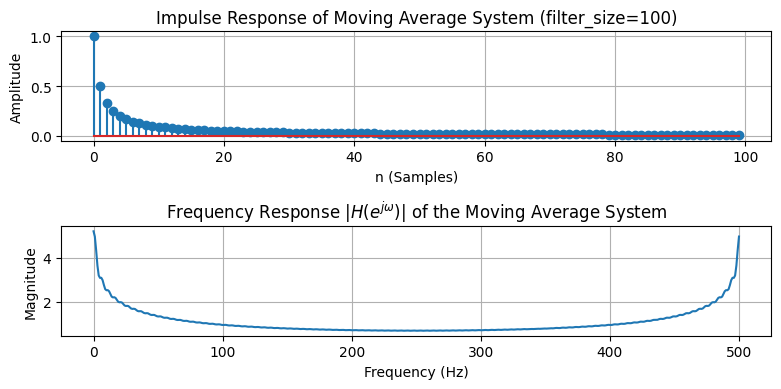

In [5]:
filter_size = 100
fs = 1000 # arbritary sampling rate
N = 100

impulse = unit_impulse(np.arange(N))

h_n = moving_average_system(impulse, filter_size=filter_size)
fft_len = fs // 2
freqs = np.linspace(0, fs / 2, fft_len) # Frequency range to the Nyquist
# ω = 2πf/fs
omega = 2 * np.pi * freqs / fs

H_n = np.fft.fft(h_n, fft_len)
H_mags = np.abs(H_n[:fft_len])
plt.figure(figsize=(8, 4))

plt.subplot(2, 1, 1)
plt.stem(np.arange(N), h_n)
plt.title(f"Impulse Response of Moving Average System (filter_size={filter_size})")
plt.xlabel("n (Samples)")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot the magnitude of the frequency response |H(e^{jω})|
plt.subplot(2, 1, 2)
plt.plot(freqs, H_mags)
plt.title("Frequency Response |$%s$| of the Moving Average System" % "H(e^{jω})")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)

plt.tight_layout()
plt.show()



### **Z-transform & Discrete-Time Fourier Transform (DTFT)**

Below a table of Z-transforms & DTFTs:


|  Signal                        | Z-transform                      | DTFT                                     | Description                                                                                   |
|---------------------------------|-----------------------------------|------------------------------------------|------------------------------------------------------------------------------------------------|
| $ x(n) $                     | $ X(z) $                       | $ X(e^{j \omega}) $                    | The original signal $ x(n) $, with its Z-transform $ X(z) $ and DTFT $ X(e^{j \omega}) $. |
| $ x(n - M) $                 | $ z^{-M} \cdot X(z) $           | $ e^{-j \omega M} \cdot X(e^{j \omega}) $  | Time-shifted signal by $ M $ samples, introducing a phase shift in both Z-transform and DTFT. |
| $ \delta(n - M) $            | $ z^{-M} $                     | $ e^{-j \omega M} $                    | Unit impulse delayed by $ M $ samples, resulting in a simple phase shift.                     |
| $ x(n) \cdot e^{j\omega_0 n} $| $ X(z \cdot e^{-j \omega_0}) $ | $ X(e^{j(\omega - \omega_0)}) $        | Signal modulated by a frequency shift $ \omega_0 $, resulting in a frequency shift in the DTFT. |


### **Causal & Stable Systems**

- **Causality**: A system is **causal** if it does not react to an input before the input is applied. This means the output \( y(n) \) depends only on current and past inputs, not future inputs. For a causal system, \( y(n) = 0 \) for \( n < 0 \) when the input signal \( x(n) = 0 \) for \( n < 0 \).
  
- **Stability**: A system is **stable** if the sum of the absolute values of its impulse response is finite:
  
$$
\sum_{n=-\infty}^{\infty} |h(n)| < M_2 < \infty
$$


## **IIR Systems**

An IIR (Infinite Impulse Response) system is called "infinite" because the output depends not just on the current and past input values, but also on past output values. This creates an ongoing feedback loop, causing the system's impulse response to theoretically continue indefinitely.

<br><br>
$$
\large
y(n) = x(n) - a_1 y(n - 1) - a_2 y(n - 2)
\large
$$

<br><br>

*Note that for $n = 0$ and $n = 1$, we calculate $y(n - 1)$ and $y(n - 2)$ as 0 because these indexes are out of bounds.*

In this system, the output is "fed back" through delay elements and combined with the input. This is why IIR systems are also called recursive systems, as the output is recursively defined in terms of itself.


**Deriving the transfer function**

Starting point IIR system equation

$
y(n) = x(n) - a_1 y(n - 1) - a_2 y(n - 2)
$

Apply the  z-transform to both sides (as table above).  This gives:

$
Y(Z) = X(z) - a_1 z^{-1} \cdot Y(z) - a_2 z^{-2} Y(z)
$

Now we want to express $Y(Z)$ as a function of $X(z)$ and the coefficients $a_1$ and $a_2$.  First group all the $Y(z)$ on left side:

$
Y(z) + a_1 z^{-1}Y(z) + a_2 z^{-2}Y(z) = X(z)
$

Factor out $Y(z)$:

$
 X(z) = Y(z) (1 + a_1 z^{-1} + a_2 z^{-2}) 
$

Now we solve for the ratio $Y(Z) / X(z)$  for the transfer function $H(z)$:

<br><br>
$$
\large
H(z) = \frac{Y(z)}{X(z)} = \frac{Y(z)}{Y(z)(1 + a_1 z^{-1} + a_2 z^{-2})} = \frac{1}{1 + a_1 z^{-1} + a_2 z^{-2}}
\large
$$
<br><br>







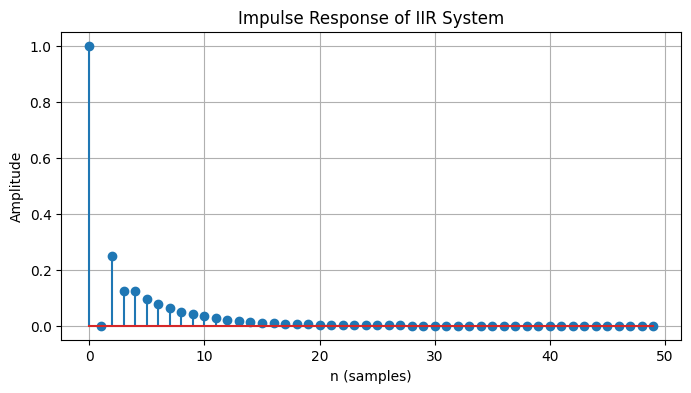

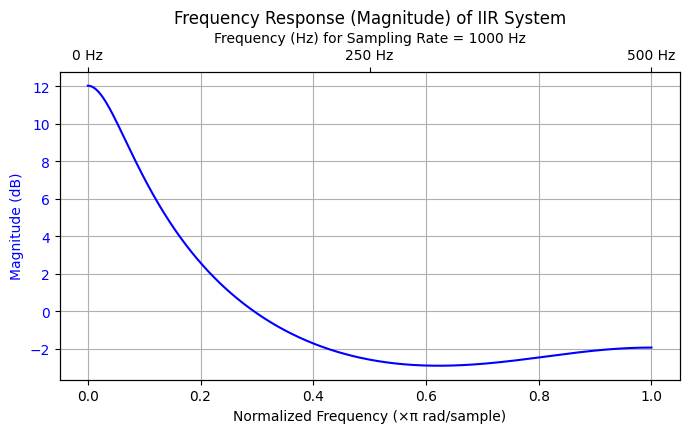

In [6]:
def iir_filter(x, a1, a2):
    N = len(x)
    y = np.zeros(N)


    for n in range(N):
        # initial condition
        if n == 0:
            y[n] = x[n] 

        elif n == 1:
            y[n] = x[n] * y[n - 1]

        else:
           y[n] = x[n] - a1 * y[n - 1] - a2 * y[n - 2]

    return y

def freq_response(a1, a2, n_points=512):
    w = np.linspace(0, np.pi, n_points) # frequency range
    H = np.zeros_like(w, dtype=complex)

    # computing transfer function for each frequency
    for i, omega in enumerate(w):
        z = np.exp(1j * omega) # z = e^(jω)
        H[i] = 1 / (1 + a1 * z**-1 + a2 * z**-2) # transfer function

    return w, H


# coefficients
a1 = -0.5
a2 = -0.25

# samplig freq 
fs= 1000

# unit 
N = 50  # Number of samples
impulse = unit_impulse(np.arange(N))
impulse_response = iir_filter(impulse, a1, a2)

# Plot the impulse response
plt.figure(figsize=(8, 4))
plt.stem(np.arange(N), impulse_response)
plt.title('Impulse Response of IIR System')
plt.xlabel('n (samples)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Compute and plot the frequency response (transfer function)
# w for omega
w, h = freq_response(a1, a2)

db_mag = 20 * np.log10(abs(h)) # reference is 1.0
radians_per_sample = w / np.pi 

# actual frequencies but we are going to use only 0 hz, fs/4 and fs/2 in the plot
# freq_hz = (w / (2 * np.pi)) * fs

# 0 Hz, fs/4, fs/2 for w = 0, w = pi / 2 and w = pi
hertz_ticks = np.array([0, np.pi/2, np.pi]) / (2 * np.pi) * fs  

fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.plot(radians_per_sample, db_mag, 'b')
ax1.set_xlabel('Normalized Frequency (×π rad/sample)')
ax1.set_ylabel('Magnitude (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

ax2 = ax1.twiny()

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks([0, 0.5, 1])  # Normalized frequency ticks
ax2.set_xticklabels([f'{int(h)} Hz' for h in hertz_ticks]) 

ax2.set_xlabel(f'Frequency (Hz) for Sampling Rate = {fs} Hz')
plt.title('Frequency Response (Magnitude) of IIR System')
plt.show()

###  **Extending the Delay Line IIR Filter**

We can extend the delay lines for both the **input** and **output**. The input is delayed by up to $N-1$ elements, and the output is delayed by up to $M$ elements. This results in a more complex filter structure.

**Difference Equation**

$
y(n) = - \sum\limits_{k = 0}^{M}a_k y(n - k) + \sum\limits_{k=0}^{N - 1} b_k x(n - k)
$

And the Z-transform of the difference equation is

$
y(z) = \sum\limits_{k = 0}^M a_k \cdot z^{-k} Y(z) + \sum\limits_{k=0}^{N-1} b_k \cdot z^{-k} X(z)
$

Solving for $H(z) = \frac{Y(z)}{X(z)}$, we get the transfer function:

$$
\large
H(Z) = \frac{\sum\limits_{k=1}^{N-1}b_k z^{-k}}{1 + \sum\limits_{k=0}^{M}a_k z^{-k}}
\large
$$
<br><br>
Below is an example implementation of a **2nd-order IIR filter**. In this type of filter, the **feedback** (output delay) and/or feedforward **(input delay)** terms go back up to **two** previous samples. This means the filter's output depends not only on the current input but also on the input and output values from the previous two samples.

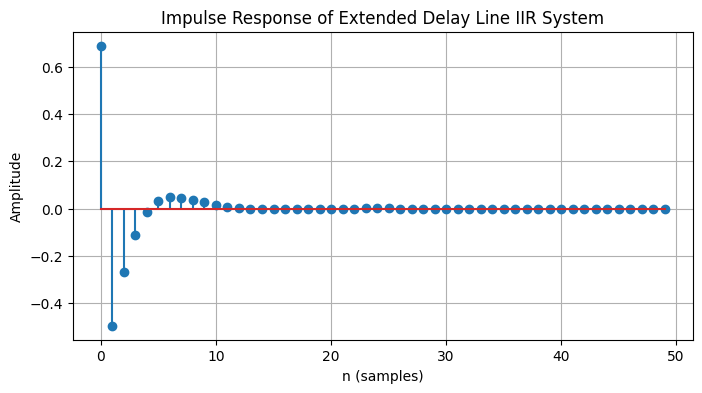

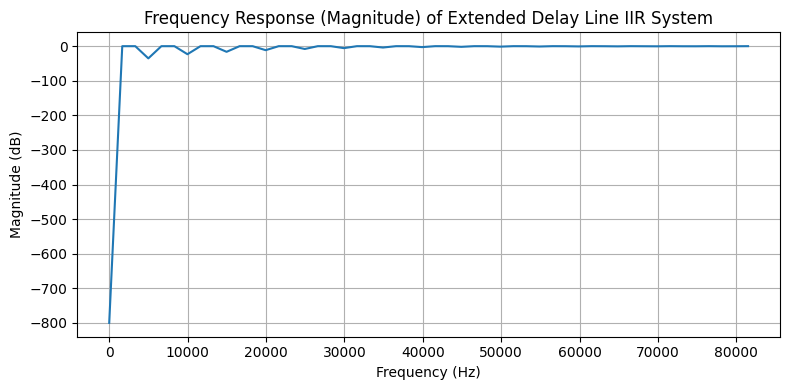

In [7]:
# coefficients, because we have 2nd-order, we need 3 coeffs, for 0, and the delays n-1 and n-2.
a = [1, -1.28, 0.47] # Output (feedback) (a0, a1, a2)
b = [0.69, -1.38, 0.69] # input (feedfowars) (b0, b1, b2)
N = 50 # number of samples
fs=1000 
n_freq_steps = 512
epsilon = 1e-40 # avoid division by 0

def iir_filter(x,a, b):
    N = len(x)
    M = len(a) - 1 # number of output delays (M terms in feedback
    N_minus_1 = len(b) # number of input dealys (N-1 terms in feedforward)
    y = np.zeros(N)
    
    # note we ignore calculation when n - k <= 0
    for n in range(N):
        # input side side:a feedfoward
        for k in range(1, M+1):
            if n - k >= 0:
                y[n] -= a[k] * y[n - k]

        # output side: feedback
        for k in range(N_minus_1):
            if n - k >= 0:
                y[n] += b[k] * x[n - k]

    return y

def freq_response(a, b, n_points=n_freq_steps):
    w = np.linspace(0, n_points) # omegas
    H = np.zeros_like(w, dtype=complex)

    for i, omega in enumerate(w):
        z = np.exp(1j * omega) # z = e^(jω)
        num = sum(b[k] * z**-k for k in range(len(b))) # feedforward (input)
        den = 1 + sum(a[k] * z**-k for k in range(1, len(a))) # Feeback (output)
        H[i] = num / den

    return w, H
    
    
impulse = unit_impulse(np.arange(N))
impulse_response = iir_filter(impulse, a, b)
w, H = freq_response(a, b)
freq_hz = (w / (2 * np.pi)) * fs
mags_db = 20 * np.log10(np.abs(H) + epsilon)

# plotting impulse response
plt.figure(figsize=(8, 4))
plt.stem(np.arange(N), impulse_response)
plt.title('Impulse Response of Extended Delay Line IIR System')
plt.xlabel('n (samples)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.figure(figsize=(8, 4))
plt.plot(freq_hz, mags_db )
plt.title('Frequency Response (Magnitude) of Extended Delay Line IIR System')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.tight_layout()
plt.show()

## **FIR Systems**

Contrastingly, an **FIR (Finite Impulse Response)** system is a type of digital filter where the output depends solely on a finite number of past input values. Unlike IIR (Infinite Impulse Response) filters, which have feedback and can theoretically respond indefinitely, FIR filters do not use feedback; they only involve feedforward operations. This means that the impulse response of an FIR filter settles to zero after a finite number of samples, making the system inherently stable.

For example, consider a simple FIR filter described by the following difference equation with no feedback, only feedforward terms:

$
y(n) = b_0x(n) + b_1 x(n - 1) + b_2 x(n - 2)
$

The Z-transform of this equation is:

$
Y(z) = b_0X(z) + b_1 z^{-1} X(z) + b_2 z^{-2} X(z)
$

Factoring out $ X(z) $, we get:

$
Y(z) = X(z)(b_0 + b_1 z^{-1} + b_2 z^{-2})
$

Solving for the transfer function

$
H(z) = \frac{Y(z)}{X(z)} = \frac{X(z)(b_0 + b_1 z^{-1} + b_2 z^{-2})}{X(z)} 
$

We obtain:

<br><br>
$$
\large
H(z) = b_0 + b_1 z^{-1} + b_2 z^{-2}
\large
$$
<br><br>

This shows that an FIR system is represented by a polynomial in $ z^{-1} $, with no terms involving $ Y(z) $, confirming that the system is purely feedforward.

### **General Example**

A more general example of an FIR system could involve a feedforward delay line with $ N-1 $ delay elements, described by the following difference equation:

<br><br>

$$
\large
y(n) = \sum\limits_{k=0}^{N-1} b_k x(n - k)
\large
$$

<br><br>

In this general case, the output $ y(n) $ depends on the current input $ x(n) $ and the past $ N-1 $ input values, with each delayed input scaled by the corresponding coefficient $ b_k $.

The finite impulse response is given by:

<br><br>
$$
\large
h(n) = \sum\limits_{k=0}^{N-1}b_k^{\delta(n - k)}
\large
$$

<br><br>

which shows that each impulse of $h(n)$ is represented by a weighted and shifted unit impulse. The **Z-transform** of the impulse response leads to the following transfer function:

<br><br>

$$
\large
H(z) = \sum\limits_{k=0}^{N-1}b_k z^{-k}
\large
$$

<br><br>

#### **Example Implementation**

The time-domain algorithm for the FIR systems are the same of the IIR , with the exception that the recurisve part is missing.


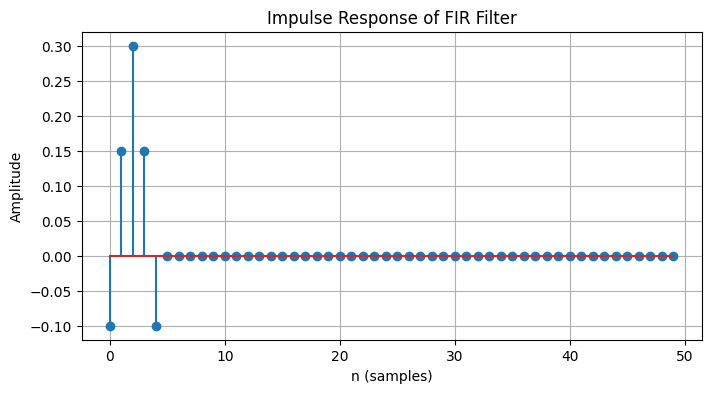

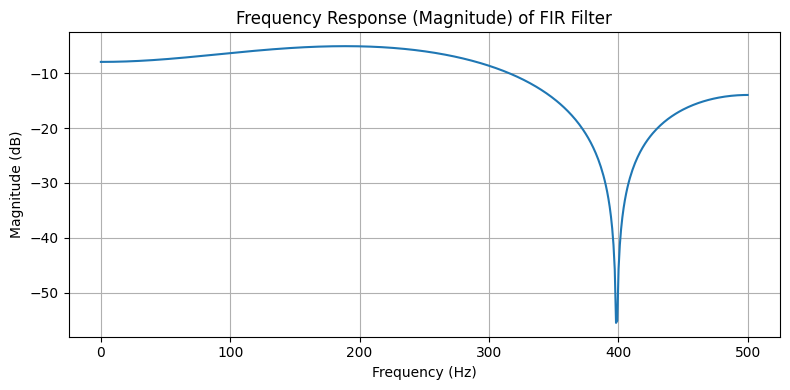

In [8]:

# Coefficients for a simple FIR filter (feedforward only)
b = [-0.1, 0.15, 0.3, 0.15, -0.1] 
N = 50  # Number of samples
fs = 1000  # Sampling frequency
n_freq_steps = 512
epsilon = 1e-40  # To avoid division by 0

# Define the FIR filter using a similar structure as your IIR implementation
def fir_filter(x, b):
    N = len(x)
    M = len(b)  # Number of feedforward coefficients
    y = np.zeros(N)
    
    # Apply the difference equation for the FIR filter (feedforward only)
    for n in range(N):
        for k in range(M):
            if n - k >= 0:
                y[n] += b[k] * x[n - k]  # Feedforward part (input)
    
    return y

# Frequency response for FIR filter
def freq_response_fir(b, n_points=n_freq_steps):
    w = np.linspace(0, np.pi, n_points)  # Omegas over [0, pi] (normalized frequency)
    H = np.zeros_like(w, dtype=complex)

    for i, omega in enumerate(w):
        z = np.exp(1j * omega)  # z = e^(jω)
        num = sum(b[k] * z**-k for k in range(len(b)))  # Feedforward (input)
        H[i] = num  # Since FIR has no feedback, denominator is 1
    
    return w, H

# Generate unit impulse response
def unit_impulse(N):
    impulse = np.zeros(N)
    impulse[0] = 1  # Unit impulse at n=0
    return impulse

# Compute impulse response for FIR filter
impulse = unit_impulse(N)
impulse_response = fir_filter(impulse, b)

# Compute frequency response for FIR filter
w, H = freq_response_fir(b)
freq_hz = (w / (2 * np.pi)) * fs
mags_db = 20 * np.log10(np.abs(H) + epsilon)

# Plotting impulse response
plt.figure(figsize=(8, 4))
plt.stem(np.arange(N), impulse_response)
plt.title('Impulse Response of FIR Filter')
plt.xlabel('n (samples)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plotting frequency response
plt.figure(figsize=(8, 4))
plt.plot(freq_hz, mags_db)
plt.title('Frequency Response (Magnitude) of FIR Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

plt.tight_layout()
plt.show()